In [10]:
!pip install pandas numpy nltk wordcloud matplotlib seaborn gensim pyLDAvis
!pip install --upgrade numpy gensim
!pip install bertopic
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 57.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 534.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 M

In [1]:
import pandas as pd

bbc_url = 'https://raw.githubusercontent.com/WinNatch/UoB_SM-WA/main/BBC_LFC.csv'
sky_url = 'https://raw.githubusercontent.com/WinNatch/UoB_SM-WA/main/Skysports_LFC.csv'
tia_url = 'https://raw.githubusercontent.com/WinNatch/UoB_SM-WA/main/Thisisanfield_LFC.csv'

bbc_df = pd.read_csv(bbc_url)
sky_df = pd.read_csv(sky_url)
tia_df = pd.read_csv(tia_url)

print(bbc_df.info())
print(sky_df.info())
print(tia_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          698 non-null    object
 1   Time          698 non-null    object
 2   Headline      698 non-null    object
 3   Body Context  698 non-null    object
dtypes: object(4)
memory usage: 21.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1280 non-null   object
 1   Time          1280 non-null   object
 2   Headline      1280 non-null   object
 3   Body Context  1280 non-null   object
dtypes: object(4)
memory usage: 40.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0  

In [2]:
for df in [bbc_df, sky_df, tia_df]:
    if 'URL' in df.columns:
        df.drop(columns=['URL'], inplace=True)

bbc_df = bbc_df.rename(columns={'Date': 'date', 'Time': 'time', 'Headline': 'headline', 'Body Context': 'news_text'})[
    ['date', 'time', 'headline', 'news_text']]

sky_df = sky_df.rename(columns={'Date': 'date', 'Time': 'time', 'Headline': 'headline', 'Body Context': 'news_text'})[
    ['date', 'time', 'headline', 'news_text']]

tia_df = tia_df.rename(columns={'Date': 'date', 'Time': 'time', 'Headline': 'headline', 'Body Context': 'news_text'})[
    ['date', 'time', 'headline', 'news_text']]

bbc_df['reporter'] = 'BBC'
sky_df['reporter'] = 'SkySports'
tia_df['reporter'] = 'ThisIsAnfield'

tia_df['date'] = pd.to_datetime(tia_df['date'], format='%d-%b-%y').dt.strftime('%m/%d/%Y')

lfc_df = pd.concat([bbc_df, sky_df, tia_df], ignore_index=True)

print(lfc_df.head())
print(f"\nTotal rows: {len(lfc_df)}")
print(lfc_df.info())

        date   time                                           headline  \
0  3/17/2025  17:48  'Everything was sunshine and rainbows' - Van Dijk   
1  3/17/2025  15:14    Is Salah's cup finals record his Achilles heel?   
2  3/17/2025  15:00        Liverpool 'can suffer' final defeat - James   
3  3/17/2025  13:55              'We want to bounce back, and we will'   
4  3/17/2025  12:06          'Lack of quality depth must be addressed'   

                                           news_text reporter  
0  Liverpool captain Virgil van Dijk says "good t...      BBC  
1  Alongside his team-mates, it was a difficult d...      BBC  
2  Former Liverpool goalkeeper David James says L...      BBC  
3  Liverpool captain Virgil van Dijk on Instagram...      BBC  
4  In the space of a week, the Arne Slot machine ...      BBC  

Total rows: 7567
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ---

In [3]:
duplicates_count = lfc_df.duplicated().sum()
lfc_df = lfc_df.drop_duplicates()

print(f"Total duplicates removed: {duplicates_count}")

missing_count = lfc_df[['headline', 'news_text']].isnull().sum()
lfc_df = lfc_df.dropna(subset=['headline', 'news_text'])

print(f"Missing values removed:\n{missing_count}")

lfc_df['date'] = pd.to_datetime(lfc_df['date'])
lfc_df['time'] = pd.to_datetime(lfc_df['time'], format='%H:%M', errors='coerce').dt.strftime('%H:%M:%S')
lfc_df['news'] = lfc_df['headline'] + " " + lfc_df['news_text']

print(f"Total rows after cleaning: {len(lfc_df)}")
print(lfc_df.head())

Total duplicates removed: 20
Missing values removed:
headline     0
news_text    0
dtype: int64
Total rows after cleaning: 7547
        date      time                                           headline  \
0 2025-03-17  17:48:00  'Everything was sunshine and rainbows' - Van Dijk   
1 2025-03-17  15:14:00    Is Salah's cup finals record his Achilles heel?   
2 2025-03-17  15:00:00        Liverpool 'can suffer' final defeat - James   
3 2025-03-17  13:55:00              'We want to bounce back, and we will'   
4 2025-03-17  12:06:00          'Lack of quality depth must be addressed'   

                                           news_text reporter  \
0  Liverpool captain Virgil van Dijk says "good t...      BBC   
1  Alongside his team-mates, it was a difficult d...      BBC   
2  Former Liverpool goalkeeper David James says L...      BBC   
3  Liverpool captain Virgil van Dijk on Instagram...      BBC   
4  In the space of a week, the Arne Slot machine ...      BBC   

                  

In [4]:
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**BOW**

In [5]:
# Custom stopwords list
custom_stopwords = {

    # Tournament Name
    'premier', 'league',

    # Days of the week and time related word
    'sunday', 'saturday', 'wednesday', 'friday', 'tuesday', 'monday', 'thursday', 'weekend', 'year', 'night', 'evening', 'afternoon', 'morning', 'preseason',

    # Months of the year
    'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',

    # Common football/journalistic phrases
    'last', 'summer', 'may', 'made', 'confirmed', 'following', 'next', 'take', 'put',
    'left', 'face', 'level', 'lot', 'half', 'record', 'former', 'strong', 'contract',
    'likely', 'expect', 'number', 'report', 'weekend', 'home', 'away', 'say', 'told', 'early',

    # Number
    'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty',

    # Miscellaneous filler words
    'one', 'back', 'away', 'though', 'far', 'way', 'big', 'moment', 'move', 'made', 'take', 'news',
    'time', 'plan', 'really', 'change', 'need', 'always', 'think', 'given', 'england', 'big', 'man',

    # Other unnecessary terms
    'yearold', 'today', 'yesterday', 'tomorrow', 'said', 'says', 'week', 'month', 'day', 'already', 'new', 'thing',
    'still', 'good', 'best', 'first', 'second', 'time', 'minute', 'another', 'expected', 'well', 'thought', 'want', 'await',
    'going', 'know', 'needed', 'return', 'start', 'change', 'talk', 'chance', 'show', 'play', 'played', 'everything', 'every',

    # Liverpool-related terms (team, stadium, sponsors)
    'liverpool', 'liverpools', 'lfc', 'anfield', 'axa', 'carabao', 'reds', 'kop', 'scouser', 'ynwa', 'merseyside', 'red',

    # Filler Words (Contextually Irrelevant)
    'see', 'look', 'came', 'came', 'making', 'taking', 'set', 'came', 'give', 'got', 'ahead', 'saw', 'yet', 'without', 'make', 'come',
    'remain', 'early', 'late', 'interest', 'decision', 'including', 'revealed', 'situation', 'part', 'much', 'place', 'visit',
    'charge', 'situation', 'explain', 'hope', 'better', 'key', 'due', 'stay', 'came', 'future', 'past', 'leave', 'recent', 'almost'
}

In [6]:
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def generate_tokens(news_text):
    words = []
    for word in news_text.split():
        lemmatized_word = lemmatizer.lemmatize(word)
        if lemmatized_word not in stop_words and len(lemmatized_word) > 2:
            words.append(lemmatized_word)
    return words

lfc_df['clean_news'] = lfc_df['news'].apply(clean_text)
lfc_df['tokens'] = lfc_df['clean_news'].apply(generate_tokens)

print(lfc_df[['news', 'clean_news', 'tokens']].head())

                                                news  \
0  'Everything was sunshine and rainbows' - Van D...   
1  Is Salah's cup finals record his Achilles heel...   
2  Liverpool 'can suffer' final defeat - James Fo...   
3  'We want to bounce back, and we will' Liverpoo...   
4  'Lack of quality depth must be addressed' In t...   

                                          clean_news  \
0  everything was sunshine and rainbows van dijk ...   
1  is salahs cup finals record his achilles heel ...   
2  liverpool can suffer final defeat james former...   
3  we want to bounce back and we will liverpool c...   
4  lack of quality depth must be addressed in the...   

                                              tokens  
0  [everything, sunshine, rainbow, van, dijk, liv...  
1  [salah, cup, final, record, achilles, heel, al...  
2  [liverpool, suffer, final, defeat, james, form...  
3  [want, bounce, back, liverpool, captain, virgi...  
4  [lack, quality, depth, must, addressed, space,..

In [7]:
stop_words = set(stopwords.words('english'))
stop_words.update(custom_stopwords)

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def generate_tokens(news_text):
    words = []
    for word in news_text.split():
        lemmatized_word = lemmatizer.lemmatize(word)
        if lemmatized_word not in stop_words and len(lemmatized_word) > 2:
            words.append(lemmatized_word)
    return words

lfc_df['clean_news'] = lfc_df['news'].apply(clean_text)
lfc_df['tokens_st'] = lfc_df['clean_news'].apply(generate_tokens)

print(lfc_df[['news', 'clean_news', 'tokens_st']].head())

                                                news  \
0  'Everything was sunshine and rainbows' - Van D...   
1  Is Salah's cup finals record his Achilles heel...   
2  Liverpool 'can suffer' final defeat - James Fo...   
3  'We want to bounce back, and we will' Liverpoo...   
4  'Lack of quality depth must be addressed' In t...   

                                          clean_news  \
0  everything was sunshine and rainbows van dijk ...   
1  is salahs cup finals record his achilles heel ...   
2  liverpool can suffer final defeat james former...   
3  we want to bounce back and we will liverpool c...   
4  lack of quality depth must be addressed in the...   

                                           tokens_st  
0  [sunshine, rainbow, van, dijk, captain, virgil...  
1  [salah, cup, final, achilles, heel, alongside,...  
2  [suffer, final, defeat, james, goalkeeper, dav...  
3  [bounce, captain, virgil, van, dijk, instagram...  
4  [lack, quality, depth, must, addressed, space,..

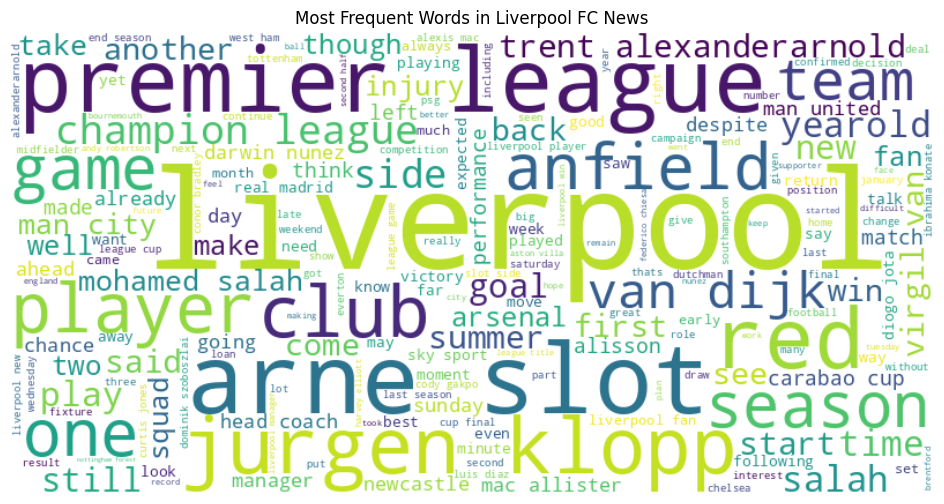

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([' '.join(tokens) for tokens in lfc_df['tokens']])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Liverpool FC News")
plt.show()

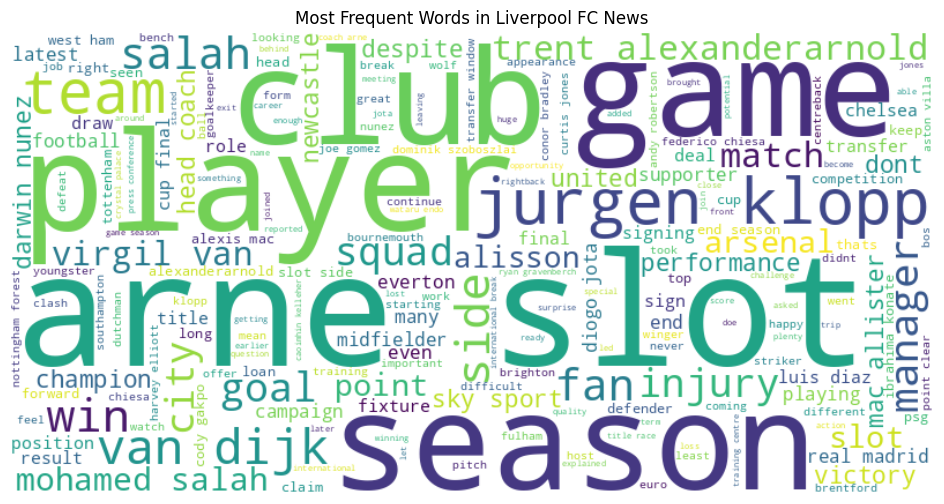

In [9]:
all_words = ' '.join([' '.join(tokens) for tokens in lfc_df['tokens_st']])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Liverpool FC News")
plt.show()

In [25]:
dictionary = corpora.Dictionary(lfc_df['tokens_st'])
corpus = [dictionary.doc2bow(text) for text in lfc_df['tokens_st']]

print(f"Number of unique tokens: {len(dictionary)}")
print(f"Number of documents: {len(corpus)}")
print("Sample BOW representation:", corpus[:3])

Number of unique tokens: 18971
Number of documents: 7547
Sample BOW representation: [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 3), (10, 4), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 4), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 6), (8, 1), (9, 1), (15, 9), (20, 1), (21, 1), (30, 3), (40, 1), (58, 1), (59, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 4), (88

Num Topics: 10, Coherence Score: 0.4183
Num Topics: 12, Coherence Score: 0.4132
Num Topics: 14, Coherence Score: 0.3966
Num Topics: 16, Coherence Score: 0.4216
Num Topics: 18, Coherence Score: 0.4028
Num Topics: 20, Coherence Score: 0.4481
Num Topics: 22, Coherence Score: 0.4077
Num Topics: 24, Coherence Score: 0.4223
Num Topics: 26, Coherence Score: 0.4163
Num Topics: 28, Coherence Score: 0.4347
Num Topics: 30, Coherence Score: 0.4586


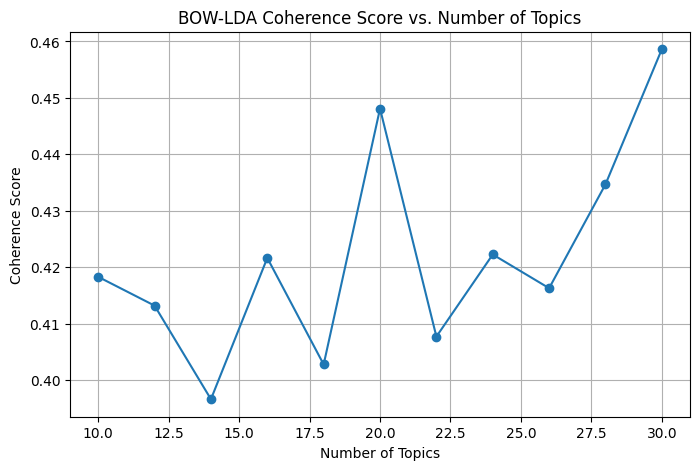

Optimal Number of Topics: 30


In [26]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

tokenized_texts = lfc_df['tokens_st'].tolist()

dictionary_tweet = corpora.Dictionary(tokenized_texts)
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in tokenized_texts]

def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    for num_topics in topic_range:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=20,
            iterations=200,
            per_word_topics=False
        )
        coherence_model = CoherenceModel(
            model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    return coherence_scores

topic_range = range(10, 31, 2)

coherence_scores = compute_coherence_values(dictionary_tweet, corpus_tweet, tokenized_texts, topic_range)

plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("BOW-LDA Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal Number of Topics: {optimal_topic_num}")

In [26]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

tokenized_texts = lfc_df['tokens_st'].tolist()

dictionary_tweet = corpora.Dictionary(tokenized_texts)
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in tokenized_texts]

# Train BOWLDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=30,
    random_state=42,
    passes=20,
    iterations=700,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

print("\n LDA Topics (BoW)")
for topic_id, words in lda_model.show_topics(num_topics=30, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")


=== LDA Topics (BoW) ===
Topic 0: ['club', 'transfer', 'deal', 'million', 'claim', 'latest', 'signing', 'offer', 'window', 'could']
Topic 1: ['loan', 'palace', 'crystal', 'doak', 'season', 'carvalho', 'spell', 'club', 'championship', 'leipzig']
Topic 2: ['city', 'arsenal', 'title', 'point', 'everton', 'game', 'side', 'villa', 'top', 'park']
Topic 3: ['salah', 'goal', 'mohamed', 'diaz', 'win', 'gakpo', 'assist', 'luis', 'szoboszlai', 'cody']
Topic 4: ['tottenham', 'spur', 'nation', 'africa', 'reveals', 'sheffield', 'knee', 'frustrating', 'hailed', 'afcon']
Topic 5: ['brentford', 'leicester', 'content', 'henry', 'consecutive', 'christmas', 'ridiculous', 'boxing', 'criticism', 'frank']
Topic 6: ['elliott', 'harvey', 'prague', 'sparta', 'europa', 'player', 'named', 'morton', 'game', 'absentee']
Topic 7: ['alexanderarnold', 'trent', 'real', 'madrid', 'zubimendi', 'martin', 'alexanderarnolds', 'rightback', 'barcelona', 'spanish']
Topic 8: ['nunez', 'darwin', 'lijnders', 'feyenoord', 'slot',

In [27]:
lda_model_bow = lda_model

In [28]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

bow_lda_display = gensimvis.prepare(lda_model_bow, corpus, dictionary)
pyLDAvis.display(bow_lda_display)

**TF-IDF**

In [12]:
from gensim.models import TfidfModel
import gensim.corpora as corpora

dictionary_tf = corpora.Dictionary(lfc_df['tokens_st'])
corpus_tf = [dictionary_tf.doc2bow(text) for text in lfc_df['tokens_st']]

tfidf = TfidfModel(corpus_tf)
corpus_tfidf = tfidf[corpus_tf]

print("Sample TF-IDF representation:", corpus_tfidf[:3])

Sample TF-IDF representation: <gensim.interfaces.TransformedCorpus object at 0x794b7f661650>


Num Topics: 10, Coherence Score: 0.4662
Num Topics: 12, Coherence Score: 0.5822
Num Topics: 14, Coherence Score: 0.5722
Num Topics: 16, Coherence Score: 0.5517
Num Topics: 18, Coherence Score: 0.5773
Num Topics: 20, Coherence Score: 0.5873
Num Topics: 22, Coherence Score: 0.5870
Num Topics: 24, Coherence Score: 0.5896
Num Topics: 26, Coherence Score: 0.5728
Num Topics: 28, Coherence Score: 0.5755
Num Topics: 30, Coherence Score: 0.5878


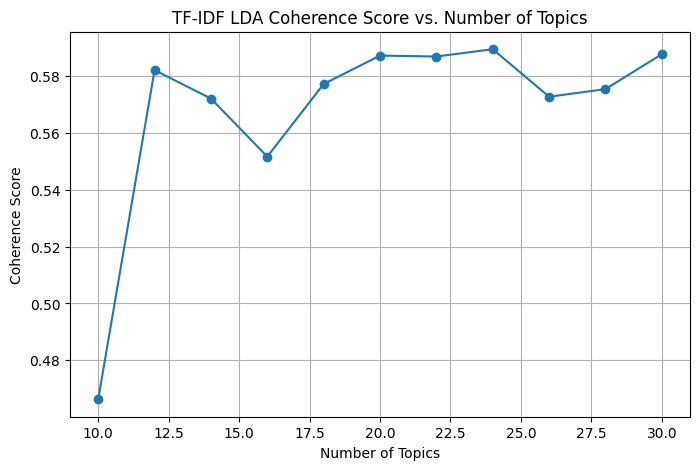


 Optimal Number of Topics (TF-IDF): 24

=== Top 10 Keywords per Topic ===
Topic 0: ['alonso', 'kit', 'friendly', 'xabi', 'leverkusen', 'trafford', 'saudi', 'zubimendi', 'milan', 'emerged']
Topic 1: ['ramsay', 'hailed', 'wigan', 'president', 'calvin', 'pitaluga', 'scottish', 'gabriel', 'black', 'marcelo']
Topic 2: ['released', 'notable', 'firm', 'artetas', 'cunha', 'hill', 'mikel', 'timing', 'relief', 'matheus']
Topic 3: ['song', 'marc', 'advice', 'heitinga', 'suarez', 'silva', 'serving', 'responsibility', 'productive', 'wearing']
Topic 4: ['klopp', 'jurgen', 'salah', 'slot', 'season', 'game', 'club', 'goal', 'win', 'manager']
Topic 5: ['named', 'burnley', 'begin', 'hint', 'adrian', 'consecutive', 'jaros', 'widely', 'backroom', 'appointed']
Topic 6: ['gareth', 'tribute', 'playoff', 'explaining', 'lifted', 'penultimate', 'chanting', 'hoped', 'acl', 'southgates']
Topic 7: ['gossip', 'bologna', 'mixed', 'tierney', 'kerkez', 'alexander', 'welcomed', 'failing', 'charged', 'appeal']
Topic 8:

In [16]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

tokenized_texts_tf = lfc_df['tokens'].tolist()

def compute_coherence_tfidf(dictionary, corpus_tfidf, texts, topic_range):
    coherence_scores = []
    models = []

    for num_topics in topic_range:
        lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics, random_state=42, passes=20, iterations=700, alpha='auto', eta='auto', minimum_probability=0.01)
        models.append(lda_model)

        coherence_model = CoherenceModel(
            model=lda_model,
            texts=texts,
            dictionary=dictionary,
            coherence='c_v'
        )

        coherence = coherence_model.get_coherence()
        coherence_scores.append(coherence)
        print(f"Num Topics: {num_topics}, Coherence Score: {coherence:.4f}")

    return models, coherence_scores

topic_range = range(10, 31, 2)

models_tfidf, coherence_scores_tfidf = compute_coherence_tfidf(dictionary_tf, corpus_tfidf, tokenized_texts_tf, topic_range)

plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores_tfidf, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("TF-IDF LDA Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

optimal_idx = coherence_scores_tfidf.index(max(coherence_scores_tfidf))
optimal_topic_num = topic_range[optimal_idx]
print(f"\n Optimal Number of Topics (TF-IDF): {optimal_topic_num}")

lda_model_optimal = models_tfidf[optimal_idx]
print("\n=== Top 10 Keywords per Topic ===")
for topic_id, words in lda_model_optimal.show_topics(num_topics=optimal_topic_num, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")

In [17]:
from gensim.models import LdaModel

lda_model_tfidf = lda_model_optimal

In [19]:
lda_display_tfidf = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary_tf)
pyLDAvis.display(lda_display_tfidf)

**BERT**

In [8]:
from bertopic import BERTopic

/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array


In [9]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(lfc_df['clean_news'])

bertopic_topics = topic_model.get_topics()
num_bertopic_topics = len(bertopic_topics)

print(f"\n=== BERTopic: {num_bertopic_topics} Topics Found ===")
for topic_id, words in bertopic_topics.items():
    print(f"Topic {topic_id}: {[word for word, _ in words[:10]]}")

topic_model.visualize_barchart(top_n_topics=10)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


=== BERTopic: 147 Topics Found ===
Topic -1: ['the', 'and', 'of', 'to', 'in', 'liverpool', 'have', 'for', 'with', 'on']
Topic 0: ['van', 'dijk', 'virgil', 'captain', 'we', 'and', 'it', 'contract', 'the', 'is']
Topic 1: ['salah', 'mo', 'mohamed', 'goals', 'goal', 'premier', 'record', 'salahs', 'league', 'assist']
Topic 2: ['nunez', 'darwin', 'nunezs', 'uruguay', 'uruguayan', 'his', 'striker', 'he', 'was', 'miss']
Topic 3: ['feyenoord', 'slot', 'arne', 'coach', 'manager', 'head', 'new', 'klopp', 'as', 'has']
Topic 4: ['lineup', 'changes', 'vs', 'starts', 'confirmed', 'starting', 'side', 'options', 'with', 'slot']
Topic 5: ['arne', 'slot', 'slots', 'win', 'league', 'their', 'first', 'the', 'at', 'top']
Topic 6: ['injuries', 'available', 'injury', 'vs', 'squad', 'news', 'without', 'players', 'team', 'fc']
Topic 7: ['chiesa', 'federico', 'juventus', 'italian', 'italy', 'chiesas', 'signing', 'fitness', 'his', 'him']
Topic 8: ['media', 'reds', 'were', 'reacted', 'heres', 'their', 'liverpool'

In [20]:
ber_topic_tokens = [
    [word for word, _ in topic[:10]]
    for topic in bertopic_topics.values() if isinstance(topic, list)
]

dict_words = set(dictionary_tf.token2id.keys())

valid_ber_topic_tokens = [
    [word for word in topic if word in dict_words]
    for topic in ber_topic_tokens
]

valid_ber_topic_tokens = [topic for topic in valid_ber_topic_tokens if topic]

print(f"Valid Topics: {len(valid_ber_topic_tokens)}")

Valid Topics: 146


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training BERTopic with 10 topics...
BERTopic (nr_topics=10) → Coherence Score: 0.5873

Training BERTopic with 15 topics...
BERTopic (nr_topics=15) → Coherence Score: 0.6111

Training BERTopic with 20 topics...
BERTopic (nr_topics=20) → Coherence Score: 0.5721

Training BERTopic with 25 topics...
BERTopic (nr_topics=25) → Coherence Score: 0.5485

Training BERTopic with 30 topics...
BERTopic (nr_topics=30) → Coherence Score: 0.5758

Training BERTopic with 35 topics...
BERTopic (nr_topics=35) → Coherence Score: 0.5850

Training BERTopic with 40 topics...
BERTopic (nr_topics=40) → Coherence Score: 0.6251

Training BERTopic with 45 topics...
BERTopic (nr_topics=45) → Coherence Score: 0.5852

Training BERTopic with 50 topics...
BERTopic (nr_topics=50) → Coherence Score: 0.5966

Training BERTopic with 55 topics...
BERTopic (nr_topics=55) → Coherence Score: 0.6187

Training BERTopic with 60 topics...
BERTopic (nr_topics=60) → Coherence Score: 0.6268

Training BERTopic with 65 topics...
BERTop

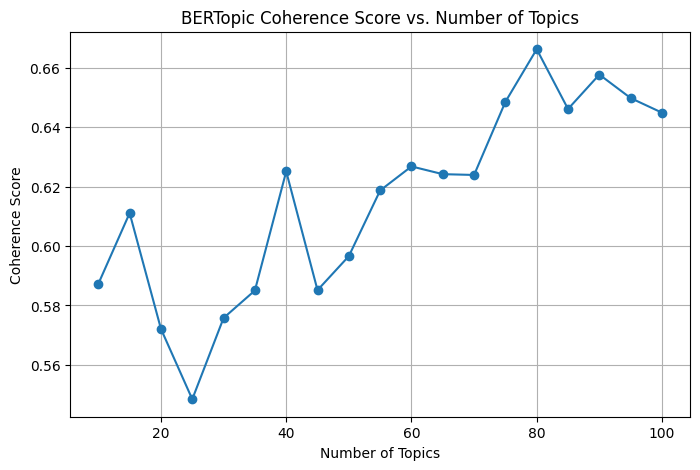


🎯 Optimal Number of Topics for BERTopic: 80


In [ ]:
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
custom_stopwords = {"liverpool", "liverpools"}
stop_words.update(custom_stopwords)

def remove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

lfc_df["clean_news"] = lfc_df["clean_news"].apply(lambda x: remove_stopwords(x, stop_words))

nr_topics_range = list(range(10, 101, 5))
coherence_scores = []

def get_topic_words(model, stop_words):
    topic_words = []
    for topic_id, topic in model.get_topics().items():
        words = [word for word, _ in topic[:10] if word.lower() not in stop_words]
        if words:
            topic_words.append(words)
    return topic_words

for nr_topics in nr_topics_range:
    print(f"\nTraining BERTopic with {nr_topics} topics...")

    topic_model = BERTopic(nr_topics=nr_topics)
    topics, _ = topic_model.fit_transform(lfc_df["clean_news"])

    bert_topic_tokens = get_topic_words(topic_model, stop_words)

    coherence_model = CoherenceModel(
        topics=bert_topic_tokens,
        texts=lfc_df["tokens"].tolist(),
        dictionary=dictionary_tweet,
        coherence="c_v"
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    print(f"BERTopic (nr_topics={nr_topics}) → Coherence Score: {coherence_score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(nr_topics_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("BERTopic Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

optimal_bert_topics = nr_topics_range[np.argmax(coherence_scores)]
print(f"\n🎯 Optimal Number of Topics for BERTopic: {optimal_bert_topics}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training BERTopic with 75 topics...
BERTopic (nr_topics=75) → Coherence Score: 0.6400

Training BERTopic with 76 topics...
BERTopic (nr_topics=76) → Coherence Score: 0.6447

Training BERTopic with 77 topics...
BERTopic (nr_topics=77) → Coherence Score: 0.6283

Training BERTopic with 78 topics...
BERTopic (nr_topics=78) → Coherence Score: 0.6471

Training BERTopic with 79 topics...
BERTopic (nr_topics=79) → Coherence Score: 0.6399

Training BERTopic with 80 topics...
BERTopic (nr_topics=80) → Coherence Score: 0.6569

Training BERTopic with 81 topics...
BERTopic (nr_topics=81) → Coherence Score: 0.6451

Training BERTopic with 82 topics...
BERTopic (nr_topics=82) → Coherence Score: 0.6508

Training BERTopic with 83 topics...
BERTopic (nr_topics=83) → Coherence Score: 0.6369

Training BERTopic with 84 topics...
BERTopic (nr_topics=84) → Coherence Score: 0.6382

Training BERTopic with 85 topics...
BERTopic (nr_topics=85) → Coherence Score: 0.6513


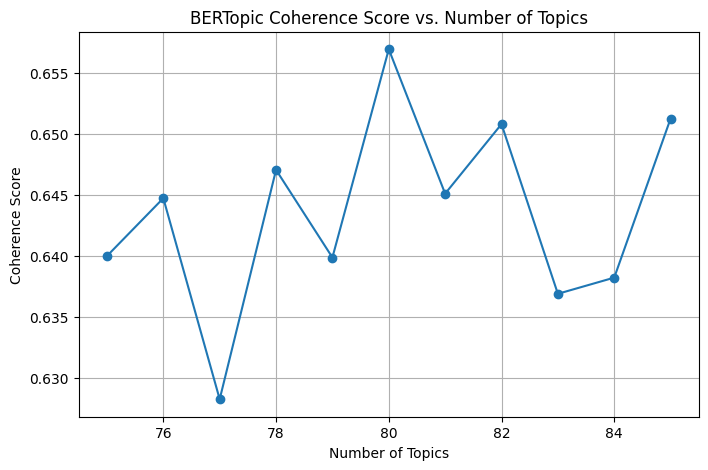


🎯 Optimal Number of Topics for BERTopic: 80


In [ ]:
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
custom_stopwords = {"liverpool", "liverpools"}
stop_words.update(custom_stopwords)

def remove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

lfc_df["clean_news"] = lfc_df["clean_news"].apply(lambda x: remove_stopwords(x, stop_words))

nr_topics_range = list(range(75, 86, 1))
coherence_scores = []

def get_topic_words(model, stop_words):
    topic_words = []
    for topic_id, topic in model.get_topics().items():
        words = [word for word, _ in topic[:10] if word.lower() not in stop_words]
        if words:
            topic_words.append(words)
    return topic_words

for nr_topics in nr_topics_range:
    print(f"\nTraining BERTopic with {nr_topics} topics...")

    topic_model = BERTopic(nr_topics=nr_topics)
    topics, _ = topic_model.fit_transform(lfc_df["clean_news"])

    bert_topic_tokens = get_topic_words(topic_model, stop_words)

    coherence_model = CoherenceModel(
        topics=bert_topic_tokens,
        texts=lfc_df["tokens"].tolist(),
        dictionary=dictionary_tweet,
        coherence="c_v"
    )
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    print(f"BERTopic (nr_topics={nr_topics}) → Coherence Score: {coherence_score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(nr_topics_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("BERTopic Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

optimal_bert_topics = nr_topics_range[np.argmax(coherence_scores)]
print(f"\n🎯 Optimal Number of Topics for BERTopic: {optimal_bert_topics}")

In [ ]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
custom_stopwords = {"liverpool", "liverpools"}
stop_words.update(custom_stopwords)

def remove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

lfc_df["clean_news"] = lfc_df["clean_news"].apply(lambda x: remove_stopwords(x, stop_words))

def get_topic_words(model, stop_words):
    topic_words = []
    for topic_id, topic in model.get_topics().items():
        words = [word for word, _ in topic[:10] if word.lower() not in stop_words]
        if words:
            topic_words.append(words)
    return topic_words

def display_topics(model, label):
    print(f"\n=== {label} ===")
    for topic_id, words in model.get_topics().items():
        if topic_id == -1:
            continue
        word_list = [word for word, _ in words[:10]]
        print(f"Topic {topic_id}: {word_list}")

coherence_results = {}

for n_topics in [80]:
    print(f"\nTraining BERTopic with {n_topics} topics...")
    model = BERTopic(nr_topics=n_topics)
    topics, _ = model.fit_transform(lfc_df["clean_news"])

    topic_tokens = get_topic_words(model, stop_words)

    coherence = CoherenceModel(
        topics=topic_tokens,
        texts=lfc_df["tokens"].tolist(),
        dictionary=dictionary_tweet,
        coherence="c_v"
    ).get_coherence()

    coherence_results[n_topics] = {
        "model": model,
        "coherence": coherence,
        "topic_tokens": topic_tokens
    }

print("\n Coherence Scores:")
for n, result in coherence_results.items():
    print(f"BERTopic with {n} topics → Coherence Score: {result['coherence']:.4f}")

for n, result in coherence_results.items():
    display_topics(result["model"], f"BERTopic ({n} topics)")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training BERTopic with 80 topics...

📊 Coherence Scores:
BERTopic with 80 topics → Coherence Score: 0.6542

=== BERTopic (80 topics) ===
Topic 0: ['slot', 'arne', 'everton', 'goodison', 'derby', 'game', 'merseyside', 'park', 'feyenoord', 'coach']
Topic 1: ['lineup', 'vs', 'changes', 'squad', 'players', 'preseason', 'slot', 'injuries', 'training', 'back']
Topic 2: ['zubimendi', 'transfer', 'gossip', 'external', 'summer', 'martin', 'window', 'column', 'sociedad', 'move']
Topic 3: ['alexanderarnold', 'trent', 'real', 'madrid', 'alexanderarnolds', 'rightback', 'england', 'injury', 'gareth', 'southgate']
Topic 4: ['salah', 'mohamed', 'mo', 'goals', 'premier', 'goal', 'salahs', 'league', 'record', 'assist']
Topic 5: ['live', 'premier', 'man', 'pm', 'league', 'villa', 'united', 'watch', 'tv', 'vs']
Topic 6: ['salah', 'contract', 'mo', 'mohamed', 'saudi', 'egypt', 'salahs', 'egyptian', 'africa', 'offer']
Topic 7: ['klopp', 'jurgen', 'klopps', 'manager', 'farewell', 'bull', 'final', 'red', 'an

In [23]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
custom_stopwords = {"liverpool", "liverpools"}
stop_words.update(custom_stopwords)

def remove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

lfc_df["clean_news"] = lfc_df["clean_news"].apply(lambda x: remove_stopwords(x, stop_words))

def get_topic_words(model, stop_words):
    topic_words = []
    for topic_id, topic in model.get_topics().items():
        words = [word for word, _ in topic[:10] if word.lower() not in stop_words]
        if words:
            topic_words.append(words)
    return topic_words

def display_topics(model, label):
    print(f"\n=== {label} ===")
    for topic_id, words in model.get_topics().items():
        if topic_id == -1:
            continue
        word_list = [word for word, _ in words[:10]]
        print(f"Topic {topic_id}: {word_list}")

coherence_results = {}

for n_topics in [80]:
    print(f"\nTraining BERTopic with {n_topics} topics...")
    model = BERTopic(nr_topics=n_topics)
    topics, _ = model.fit_transform(lfc_df["clean_news"])

    topic_tokens = get_topic_words(model, stop_words)

    coherence = CoherenceModel(
        topics=topic_tokens,
        texts=lfc_df["tokens"].tolist(),
        dictionary=dictionary_tf,
        coherence="c_v"
    ).get_coherence()

    coherence_results[n_topics] = {
        "model": model,
        "coherence": coherence,
        "topic_tokens": topic_tokens
    }

print("\n Coherence Scores:")
for n, result in coherence_results.items():
    print(f"BERTopic with {n} topics → Coherence Score: {result['coherence']:.4f}")

for n, result in coherence_results.items():
    display_topics(result["model"], f"BERTopic ({n} topics)")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Training BERTopic with 80 topics...

 Coherence Scores:
BERTopic with 80 topics → Coherence Score: 0.6413

=== BERTopic (80 topics) ===
Topic 0: ['slot', 'arne', 'coach', 'game', 'feyenoord', 'head', 'slots', 'team', 'league', 'manager']
Topic 1: ['salah', 'mo', 'mohamed', 'salahs', 'contract', 'egyptian', 'saudi', 'egypt', 'goals', 'premier']
Topic 2: ['lineup', 'vs', 'changes', 'squad', 'preseason', 'players', 'slot', 'injuries', 'training', 'reds']
Topic 3: ['transfer', 'zubimendi', 'summer', 'gossip', 'den', 'berg', 'external', 'window', 'martin', 'move']
Topic 4: ['premier', 'man', 'united', 'league', 'live', 'watch', 'pm', 'title', 'arsenal', 'vs']
Topic 5: ['alexanderarnold', 'trent', 'real', 'madrid', 'alexanderarnolds', 'england', 'rightback', 'injury', 'contract', 'gareth']
Topic 6: ['nunez', 'darwin', 'nunezs', 'uruguay', 'uruguayan', 'america', 'copa', 'striker', 'luis', 'miss']
Topic 7: ['van', 'dijk', 'virgil', 'captain', 'contract', 'future', 'netherlands', 'said', 'foc

In [33]:
import matplotlib.pyplot as plt

for n, result in coherence_results.items():
    fig = result["model"].visualize_topics()

    for trace in fig.data:
        if hasattr(trace, 'marker'):
            trace.marker.color = 'lightblue'
        if hasattr(trace, 'textfont'):
            trace.textfont.color = 'lightblue'

    fig.update_layout(
        width=1000,
        height=800,
        title=f"Intertopic Distance Map for BERTopic ({n} topics)",
        title_font_size=22
    )

    fig.show()

**Coherence Comparison**

In [29]:
coherence_model_lda_bow = CoherenceModel(
    model=lda_model, texts=lfc_df['tokens_st'], dictionary=dictionary, coherence='c_v'
)
coherence_lda_bow = coherence_model_lda_bow.get_coherence()

coherence_model_lda_tfidf = CoherenceModel(
    model=lda_model_tfidf, texts=lfc_df['tokens_st'], dictionary=dictionary, coherence='c_v'
)
coherence_lda_tfidf = coherence_model_lda_tfidf.get_coherence()

coherence_model_bertopic = CoherenceModel(
    topics=valid_ber_topic_tokens, texts=lfc_df['tokens'], dictionary=dictionary, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

def calculate_lda_topic_diversity(lda_model, top_n_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=top_n_words, formatted=False)
    unique_words = set()
    for topic in topics:
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (top_n_words * lda_model.num_topics)

def calculate_bertopic_diversity(model, top_n_words=10):
    words = model.get_topics()
    unique_words = set()
    for topic in words.values():
        unique_words.update([word for word, _ in topic[:top_n_words]])
    return len(unique_words) / (top_n_words * len(words))

lda_diversity_bow = calculate_lda_topic_diversity(lda_model)
lda_diversity_tfidf = calculate_lda_topic_diversity(lda_model_tfidf)
bertopic_diversity = calculate_bertopic_diversity(topic_model)

print(f"LDA (BoW) Coherence Score: {coherence_lda_bow:.3f}")
print(f"LDA (TF-IDF) Coherence Score: {coherence_lda_tfidf:.3f}")
print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")

print(f"LDA (BoW) Diversity Score: {lda_diversity_bow:.3f}")
print(f"LDA (TF-IDF) Diversity Score: {lda_diversity_tfidf:.3f}")
print(f"BERTopic Diversity Score: {bertopic_diversity:.3f}")

LDA (BoW) Coherence Score: 0.456
LDA (TF-IDF) Coherence Score: 0.601
BERTopic Coherence Score: 0.686
LDA (BoW) Diversity Score: 0.857
LDA (TF-IDF) Diversity Score: 0.996
BERTopic Diversity Score: 0.629


In [ ]:
topic_labels = {
    0: "Performance Analysis", #['slot', 'arne', 'everton', 'goodison', 'derby', 'game', 'merseyside', 'park', 'feyenoord', 'coach']
    1: "Pre-Match Review", #['lineup', 'vs', 'changes', 'squad', 'players', 'preseason', 'slot', 'injuries', 'training', 'back']
    2: "Summer Market", #['zubimendi', 'transfer', 'gossip', 'external', 'summer', 'martin', 'window', 'column', 'sociedad', 'move']
    3: "Alexanderarnold", #['alexanderarnold', 'trent', 'real', 'madrid', 'alexanderarnolds', 'rightback', 'england', 'injury', 'gareth', 'southgate']
    4: "Salah Preformance", #['salah', 'mohamed', 'mo', 'goals', 'premier', 'goal', 'salahs', 'league', 'record', 'assist']
    5: "Matchday Promote", #['live', 'premier', 'man', 'pm', 'league', 'villa', 'united', 'watch', 'tv', 'vs']
    6: "Mohamed Salah", #['salah', 'contract', 'mo', 'mohamed', 'saudi', 'egypt', 'salahs', 'egyptian', 'africa', 'offer']
    7: "Klopp Last Season", #['klopp', 'jurgen', 'klopps', 'manager', 'farewell', 'bull', 'final', 'red', 'anfield', 'dortmund']
    8: "Van Dijk", #['van', 'dijk', 'virgil', 'captain', 'contract', 'netherlands', 'future', 'said', 'dont', 'focus']
    9: "23-24 Europa", #['europa', 'atalanta', 'sparta', 'prague', 'champions', 'league', 'leg', 'milan', 'european', 'last']
    10: "Nunez Preformance", #['nunez', 'darwin', 'uruguay', 'nunezs', 'uruguayan', 'miss', 'striker', 'goals', 'chances', 'america']
    11: "LFC GoalKeeper", #['alisson', 'kelleher', 'caoimhin', 'girona', 'goalkeeper', 'hamstring', 'alissons', 'injury', 'brazilian', 'slot']
    12: "Chiesa Transfer", #['chiesa', 'federico', 'juventus', 'italian', 'chiesas', 'italy', 'fitness', 'signing', 'training', 'winger']
    13: "Player Loan", #['loan', 'danns', 'beck', 'jayden', 'ramsay', 'owen', 'dundee', 'recall', 'recalled', 'spell']
    14: "1st Team MoveOut", #['gomez', 'joe', 'diaz', 'luis', 'barcelona', 'diazs', 'interest', 'future', 'gomezs', 'transfer']
    15: "MacAllister", #['mac', 'allister', 'alexis', 'argentina', 'allisters', 'argentine', 'america', 'copa', 'midfielder', 'player']
    16: "Referee Related", #['var', 'referee', 'penalty', 'officials', 'referees', 'appointed', 'tierney', 'confirmed', 'webb', 'vs']
    17: "Cody Gakpo", #['gakpo', 'cody', 'netherlands', 'gakpos', 'wing', 'slot', 'dutchman', 'psv', 'left', 'goals']
    18: "Konate", #['konate', 'ibrahima', 'france', 'frenchman', 'injury', 'deschamps', 'konates', 'centreback', 'didier', 'man']
    19: "LFC Squad", #['jones', 'curtis', 'midfielder', 'injury', 'england', 'training', 'klopp', 'squad', 'arne', 'slot']
    20: "Diago Jota", #['jota', 'diogo', 'injury', 'portugal', 'rib', 'portuguese', 'return', 'slot', 'arne', 'striker']
    21: "Klopp Replacement", #['alonso', 'xabi', 'leverkusen', 'bayern', 'bayer', 'alonsos', 'manager', 'munich', 'bundesliga', 'zerbi']
    22: "Harver Elliott", #['elliott', 'harvey', 'foot', 'fractured', 'elliotts', 'time', 'season', 'minutes', 'england', 'bench']
    23: "LFC-Salzburg", #['bajcetic', 'stefan', 'loan', 'salzburg', 'goalkeeper', 'lijnders', 'pitaluga', 'austrian', 'bajcetics', 'graz']
    24: "Youth Player", #['us', 'nyoni', 'youth', 'academy', 'morrison', 'goals', 'trey', 'axa', 'konedoherty', 'unders']
    25: "Conor Bradley", #['bradley', 'conor', 'northern', 'rightback', 'ireland', 'bradleys', 'injury', 'alexanderarnold', 'mbappe', 'trent']
    26: "LFC-Kit Brand", #['kit', 'adidas', 'nike', 'kits', 'leaked', 'new', 'design', 'third', 'leaks', 'shirt']
    27: "Coaching Team", #['lijnders', 'staff', 'pepijn', 'coach', 'heitinga', 'assistant', 'matos', 'backroom', 'salzburg', 'vitor']
    28: "Semi & Final Carabao", #['carabao', 'tottenham', 'cup', 'final', 'newcastle', 'semifinal', 'wembley', 'spurs', 'trophy', 'leg']
    29: "Ben Doak", #['doak', 'ben', 'middlesbrough', 'loan', 'scotland', 'winger', 'boro', 'championship', 'rejected', 'carrick']
    30: "FB Manager Team", #['director', 'edwards', 'sporting', 'michael', 'fsg', 'hughes', 'ward', 'technical', 'appointment', 'fenway']
    31: "Wataru Endo", #['endo', 'wataru', 'japan', 'asian', 'midfielder', 'endos', 'minutes', 'japans', 'minamino', 'despite']
    32: "Ryan Gravenberch", #['gravenberch', 'ryan', 'gravenberchs', 'role', 'netherlands', 'midfielder', 'dutchman', 'slot', 'arne', 'midfield']
    33: "2nd Team MoveOut", #['den', 'berg', 'sepp', 'van', 'morton', 'mainz', 'interest', 'defender', 'bundesliga', 'transfer']
    34: "Jarell Quansah", #['quansah', 'jarell', 'england', 'quansahs', 'squad', 'ipswich', 'centreback', 'breakthrough', 'gareth', 'konate']
    35: "LFC Legends", #['legends', 'eriksson', 'svengoran', 'lfc', 'torres', 'charity', 'ajax', 'gerrard', 'foundation', 'fernando']
    36: "Szoboszlai", #['szoboszlai', 'dominik', 'szoboszlais', 'hungary', 'hungarian', 'hamstring', 'injury', 'klopp', 'miss', 'captain']
    37: "Matchday Prediction", #['predictions', 'suttons', 'brentford', 'prediction', 'sutton', 'going', 'think', 'chris', 'say', 'game']
    38: "QT-Final Caraboa", #['fulham', 'craven', 'cottage', 'leg', 'cup', 'vs', 'semifinal', 'league', 'reds', 'side']
    39: "Andy Robertson", #['robertson', 'andy', 'scotland', 'hansen', 'hospital', 'alan', 'injury', 'seriously', 'leftback', 'ill']
    40: "BBC Live", #['bbc', 'action', 'listen', 'follow', 'catch', 'radio', 'live', 'reaction', 'gmt', 'stated']
    41: "LFC-ManCity", #['guardiola', 'pep', 'city', 'man', 'guardiolas', 'citys', 'title', 'sacked', 'points', 'manchester']
    42: "Fabio Carvalho", #['carvalho', 'fabio', 'hull', 'loan', 'leipzig', 'rb', 'championship', 'carvalhos', 'brentford', 'liam']
    43: "LFC Women Team", #['women', 'womens', 'wsl', 'matt', 'super', 'beard', 'beards', 'helens', 'smith', 'st']
    44: "LFC-Forest", #['forest', 'nottingham', 'newcastle', 'premier', 'ground', 'league', 'win', 'title', 'pm', 'big']
    45: "Neville & Carragher", #['neville', 'gary', 'carragher', 'jamie', 'nevilles', 'carra', 'commentary', 'sky', 'united', 'sports']
    46: "LFC-Amorim", #['amorim', 'ruben', 'sporting', 'manager', 'cp', 'portuguese', 'talks', 'xabi', 'agreement', 'candidate']
    47: "LFC-Arsenal", #['arteta', 'mikel', 'arsenal', 'saka', 'gunners', 'bukayo', 'arsenals', 'timber', 'title', 'emirates']
    48: "LFC-PSG UCL", #['psg', 'paris', 'champions', 'saintgermain', 'leg', 'princes', 'parc', 'des', 'tie', 'last']
    49: "Mamardashvili", #['mamardashvili', 'valencia', 'giorgi', 'goalkeeper', 'deal', 'georgian', 'signing', 'summer', 'georgia', 'sign']
    50: "LFC-Dumfries", #['content', 'headline', 'trent', 'dumfries', 'cash', 'carra', 'heartache', 'inters', 'peanuts', 'greener']
    51: "LFC-Wolves", #['wolves', 'leipzig', 'rb', 'league', 'molineux', 'cunha', 'champions', 'premier', 'arena', 'pm']
    52: "Internation Break", #['international', 'players', 'break', 'copa', 'america', 'duty', 'euro', 'tournament', 'action', 'called']
    53: "Interview", #['replies', 'page', 'thoughts', 'elsewhere', 'send', 'selection', 'find', 'display', 'following', 'say']
    54: "ManCity Financial Charges", #['rules', 'charges', 'city', 'hearing', 'uefa', 'man', 'financial', 'legal', 'citys', 'leagues']
    55: "Thiago Retirement", #['thiago', 'hip', 'thiagos', 'retirement', 'spaniard', 'injury', 'career', 'surgery', 'barcelona', 'bayern']
    56: "FSG Related", #['fsg', 'bordeaux', 'owners', 'musk', 'fenway', 'takeover', 'group', 'elon', 'purchase', 'french']
    57: "Jordan Henderson", #['henderson', 'jordan', 'saudi', 'ajax', 'arabia', 'alettifaq', 'hendersons', 'captain', 'pro', 'move']
    58: "Match Highlights", #['highlights', 'content', 'free', 'match', 'newcastle', 'ham', 'forliverpoolascody', 'gakposcores', 'palmaspicture', 'betweenliverpoolandlas']
    59: "Hillsborough Disaster", #['hillsborough', 'tragedy', 'chanting', 'law', 'disaster', 'victims', 'united', 'supporters', 'introduce', 'anniversary']
    60: "Anfield Expansion", #['road', 'stand', 'capacity', 'anfield', 'seats', 'expansion', 'redevelopment', 'new', 'tier', 'attendance']
    61: "Matchday Ticket", #['ticket', 'prices', 'tickets', 'ticketing', 'supporters', 'price', 'board', 'kop', 'accounts', 'rise']
    62: "Rio Ngumoha", #['ngumoha', 'rio', 'accrington', 'debut', 'stanley', 'youngestever', 'firstteam', 'yearold', 'fa', 'training']
    63: "LFC-David Coote", #['coote', 'david', 'video', 'pgmol', 'investigation', 'suspended', 'comments', 'referee', 'antiliverpool', 'immediate']
    64: "UCL League Phase", #['lille', 'champions', 'phase', 'league', 'unbeaten', 'perfect', 'record', 'townsend', 'tuesday', 'zenden']
    65: "Adrian", #['adrian', 'contract', 'goalkeeper', 'thirdchoice', 'club', 'adrians', 'rejoin', 'spaniard', 'betis', 'terms']
    66: "LFC-Anthony Gordon", #['gordon', 'anthony', 'psr', 'newcastle', 'gordons', 'comply', 'deadline', 'sustainability', 'profit', 'winger']
    67: "Lewis Koumas", #['koumas', 'lewis', 'stoke', 'championship', 'loanee', 'loan', 'loanees', 'robins', 'potters', 'pelach']
    68: "FA Cup", #['accrington', 'stanley', 'fa', 'round', 'cup', 'third', 'chiesa', 'moon', 'woods', 'dream']
    69: "Friedly Match", #['sevilla', 'palmas', 'las', 'friendly', 'preseason', 'anfield', 'august', 'pm', 'spanish', 'kick']
    70: "LFC-Leny Yoro", #['yoro', 'leny', 'lille', 'centreback', 'pursuing', 'actively', 'real', 'madrid', 'lilles', 'bid']
    71: "Joel Matip", #['matip', 'joel', 'acl', 'free', 'december', 'centreback', 'retirement', 'summer', 'surgery', 'leaving']
    72: "LFC-Plymouth FA", #['plymouth', 'argyle', 'muslic', 'fa', 'pilgrims', 'miron', 'cup', 'tie', 'championship', 'park']
    73: "LFC-Kvaratskhelia", #['kvaratskhelia', 'khvicha', 'napoli', 'winger', 'ornstein', 'interest', 'saintgermain', 'transfer', 'monitor', 'paris']
    74: "Kostas Tsimikas", #['tsimikas', 'kostas', 'leftback', 'robertson', 'andy', 'return', 'ankle', 'greek', 'positive', 'injury']
    75: "Boxing Day", #['christmas', 'boxing', 'day', 'leicester', 'gifts', 'festive', 'year', 'alder', 'hey', 'ye']
    76: "LFC-New Striker", #['marmoush', 'omar', 'frankfurt', 'eintracht', 'adeyemi', 'germany', 'interest', 'egyptian', 'goals', 'target']
    77: "Bobby Clark", #['clark', 'bobby', 'salzburg', 'lijnders', 'permanent', 'clarks', 'million', 'refusal', 'attracting', 'bid']
    78: "PSR Related" #['rules', 'sustainability', 'everton', 'docked', 'appeal', 'points', 'deduction', 'psr', 'premier', 'spending']
}

In [ ]:
# Add topic numbers and labels to lfc_df
lfc_df["lda_no"] = topics
lfc_df["lda_topic"] = lfc_df["lda_no"].map(topic_labels)

# Drop tokenized column before saving
lfc_df = lfc_df.drop(columns=["tokens", "tokens_st"], errors="ignore")

# Save to CSV
lfc_df.to_csv("lfc_sen.csv", index=False)
print("✅ DataFrame saved as 'lfc_news_with_topics.csv'")

lfc_df.info()
lfc_df.head()

✅ DataFrame saved as 'lfc_news_with_topics.csv'
<class 'pandas.core.frame.DataFrame'>
Index: 7547 entries, 0 to 7566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        7547 non-null   datetime64[ns]
 1   time        1970 non-null   object        
 2   headline    7547 non-null   object        
 3   news_text   7547 non-null   object        
 4   reporter    7547 non-null   object        
 5   news        7547 non-null   object        
 6   clean_news  7547 non-null   object        
 7   lda_no      7547 non-null   int64         
 8   lda_topic   5624 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 847.6+ KB


,date,time,headline,news_text,reporter,news,clean_news,lda_no,lda_topic
0,2025-03-17,17:48:00,'Everything was sunshine and rainbows' - Van Dijk,"Liverpool captain Virgil van Dijk says ""good t...",BBC,'Everything was sunshine and rainbows' - Van D...,everything sunshine rainbows van dijk captain ...,8,VanDijk Contract Renew
1,2025-03-17,15:14:00,Is Salah's cup finals record his Achilles heel?,"Alongside his team-mates, it was a difficult d...",BBC,Is Salah's cup finals record his Achilles heel...,salahs cup finals record achilles heel alongsi...,4,Salah Preformance
2,2025-03-17,15:00:00,Liverpool 'can suffer' final defeat - James,Former Liverpool goalkeeper David James says L...,BBC,Liverpool 'can suffer' final defeat - James Fo...,suffer final defeat james former goalkeeper da...,28,Semi & Final Carabao
3,2025-03-17,13:55:00,"'We want to bounce back, and we will'",Liverpool captain Virgil van Dijk on Instagram...,BBC,"'We want to bounce back, and we will' Liverpoo...",want bounce back captain virgil van dijk insta...,-1,NaN
4,2025-03-17,12:06:00,'Lack of quality depth must be addressed',"In the space of a week, the Arne Slot machine ...",BBC,'Lack of quality depth must be addressed' In t...,lack quality depth must addressed space week a...,1,Pre-Match Review


In [1]:
import pandas as pd

data = [
    {"#": 0,  "Name": "Performance Analysis", "Context": "'slot', 'arne', 'everton', 'goodison', 'derby', 'game', 'merseyside', 'park', 'feyenoord', 'coach'"},
    {"#": 1,  "Name": "Pre-Match Review",    "Context": "'lineup', 'vs', 'changes', 'squad', 'players', 'preseason', 'slot', 'injuries', 'training', 'back'"},
    {"#": 2,  "Name": "Summer Market",       "Context": "'zubimendi', 'transfer', 'gossip', 'external', 'summer', 'martin', 'window', 'column', 'sociedad', 'move'"},
    {"#": 3,  "Name": "Alexanderarnold",     "Context": "'alexanderarnold', 'trent', 'real', 'madrid', 'alexanderarnolds', 'rightback', 'england', 'injury', 'gareth', 'southgate'"},
    {"#": 4,  "Name": "Salah Preformance",   "Context": "'salah', 'mohamed', 'mo', 'goals', 'premier', 'goal', 'salahs', 'league', 'record', 'assist'"},
    {"#": 5,  "Name": "Matchday Promote",    "Context": "'live', 'premier', 'man', 'pm', 'league', 'villa', 'united', 'watch', 'tv', 'vs'"},
    {"#": 6,  "Name": "Mohamed Salah",       "Context": "'salah', 'contract', 'mo', 'mohamed', 'saudi', 'egypt', 'salahs', 'egyptian', 'africa', 'offer'"},
    {"#": 7,  "Name": "Klopp Last Season",   "Context": "'klopp', 'jurgen', 'klopps', 'manager', 'farewell', 'bull', 'final', 'red', 'anfield', 'dortmund'"},
    {"#": 8,  "Name": "Van Dijk",            "Context": "'van', 'dijk', 'virgil', 'captain', 'contract', 'netherlands', 'future', 'said', 'dont', 'focus'"},
    {"#": 9,  "Name": "23-24 Europa",        "Context": "'europa', 'atalanta', 'sparta', 'prague', 'champions', 'league', 'leg', 'milan', 'european', 'last'"},
    {"#": 10, "Name": "Nunez Preformance",   "Context": "'nunez', 'darwin', 'uruguay', 'nunezs', 'uruguayan', 'miss', 'striker', 'goals', 'chances', 'america'"},
    {"#": 11, "Name": "LFC GoalKeeper",      "Context": "'alisson', 'kelleher', 'caoimhin', 'girona', 'goalkeeper', 'hamstring', 'alissons', 'injury', 'brazilian', 'slot'"},
    {"#": 12, "Name": "Chiesa Transfer",     "Context": "'chiesa', 'federico', 'juventus', 'italian', 'chiesas', 'italy', 'fitness', 'signing', 'training', 'winger'"},
    {"#": 13, "Name": "Player Loan",         "Context": "'loan', 'danns', 'beck', 'jayden', 'ramsay', 'owen', 'dundee', 'recall', 'recalled', 'spell'"},
    {"#": 14, "Name": "1st Team MoveOut",    "Context": "'gomez', 'joe', 'diaz', 'luis', 'barcelona', 'diazs', 'interest', 'future', 'gomezs', 'transfer'"},
    {"#": 15, "Name": "MacAllister",         "Context": "'mac', 'allister', 'alexis', 'argentina', 'allisters', 'argentine', 'america', 'copa', 'midfielder', 'player'"},
    {"#": 16, "Name": "Referee Related",     "Context": "'var', 'referee', 'penalty', 'officials', 'referees', 'appointed', 'tierney', 'confirmed', 'webb', 'vs'"},
    {"#": 17, "Name": "Cody Gakpo",          "Context": "'gakpo', 'cody', 'netherlands', 'gakpos', 'wing', 'slot', 'dutchman', 'psv', 'left', 'goals'"},
    {"#": 18, "Name": "Konate",             "Context": "'konate', 'ibrahima', 'france', 'frenchman', 'injury', 'deschamps', 'konates', 'centreback', 'didier', 'man'"},
    {"#": 19, "Name": "LFC Squad",           "Context": "'jones', 'curtis', 'midfielder', 'injury', 'england', 'training', 'klopp', 'squad', 'arne', 'slot'"},
    {"#": 20, "Name": "Diago Jota",         "Context": "'jota', 'diogo', 'injury', 'portugal', 'rib', 'portuguese', 'return', 'slot', 'arne', 'striker'"},
    {"#": 21, "Name": "Klopp Replacement",  "Context": "'alonso', 'xabi', 'leverkusen', 'bayern', 'bayer', 'alonsos', 'manager', 'munich', 'bundesliga', 'zerbi'"},
    {"#": 22, "Name": "Harver Elliott",     "Context": "'elliott', 'harvey', 'foot', 'fractured', 'elliotts', 'time', 'season', 'minutes', 'england', 'bench'"},
    {"#": 23, "Name": "LFC-Salzburg",       "Context": "'bajcetic', 'stefan', 'loan', 'salzburg', 'goalkeeper', 'lijnders', 'pitaluga', 'austrian', 'bajcetics', 'graz'"},
    {"#": 24, "Name": "Youth Player",       "Context": "'us', 'nyoni', 'youth', 'academy', 'morrison', 'goals', 'trey', 'axa', 'konedoherty', 'unders'"},
    {"#": 25, "Name": "Conor Bradley",      "Context": "'bradley', 'conor', 'northern', 'rightback', 'ireland', 'bradleys', 'injury', 'alexanderarnold', 'mbappe', 'trent'"},
    {"#": 26, "Name": "LFC-Kit Brand",      "Context": "'kit', 'adidas', 'nike', 'kits', 'leaked', 'new', 'design', 'third', 'leaks', 'shirt'"},
    {"#": 27, "Name": "Coaching Team",      "Context": "'lijnders', 'staff', 'pepijn', 'coach', 'heitinga', 'assistant', 'matos', 'backroom', 'salzburg', 'vitor'"},
    {"#": 28, "Name": "Semi & Final Carabao","Context": "'carabao', 'tottenham', 'cup', 'final', 'newcastle', 'semifinal', 'wembley', 'spurs', 'trophy', 'leg'"},
    {"#": 29, "Name": "Ben Doak",           "Context": "'doak', 'ben', 'middlesbrough', 'loan', 'scotland', 'winger', 'boro', 'championship', 'rejected', 'carrick'"},
    {"#": 30, "Name": "FB Manager Team",    "Context": "'director', 'edwards', 'sporting', 'michael', 'fsg', 'hughes', 'ward', 'technical', 'appointment', 'fenway'"},
    {"#": 31, "Name": "Wataru Endo",        "Context": "'endo', 'wataru', 'japan', 'asian', 'midfielder', 'endos', 'minutes', 'japans', 'minamino', 'despite'"},
    {"#": 32, "Name": "Ryan Gravenberch",   "Context": "'gravenberch', 'ryan', 'gravenberchs', 'role', 'netherlands', 'midfielder', 'dutchman', 'slot', 'arne', 'midfield'"},
    {"#": 33, "Name": "2nd Team MoveOut",   "Context": "'den', 'berg', 'sepp', 'van', 'morton', 'mainz', 'interest', 'defender', 'bundesliga', 'transfer'"},
    {"#": 34, "Name": "Jarell Quansah",     "Context": "'quansah', 'jarell', 'england', 'quansahs', 'squad', 'ipswich', 'centreback', 'breakthrough', 'gareth', 'konate'"},
    {"#": 35, "Name": "LFC Legends",        "Context": "'legends', 'eriksson', 'svengoran', 'lfc', 'torres', 'charity', 'ajax', 'gerrard', 'foundation', 'fernando'"},
    {"#": 36, "Name": "Szoboszlai",         "Context": "'szoboszlai', 'dominik', 'szoboszlais', 'hungary', 'hungarian', 'hamstring', 'injury', 'klopp', 'miss', 'captain'"},
    {"#": 37, "Name": "Matchday Prediction","Context": "'predictions', 'suttons', 'brentford', 'prediction', 'sutton', 'going', 'think', 'chris', 'say', 'game'"},
    {"#": 38, "Name": "QT-Final Caraboa",   "Context": "'fulham', 'craven', 'cottage', 'leg', 'cup', 'vs', 'semifinal', 'league', 'reds', 'side'"},
    {"#": 39, "Name": "Andy Robertson",     "Context": "'robertson', 'andy', 'scotland', 'hansen', 'hospital', 'alan', 'injury', 'seriously', 'leftback', 'ill'"},
    {"#": 40, "Name": "BBC Live",           "Context": "'bbc', 'action', 'listen', 'follow', 'catch', 'radio', 'live', 'reaction', 'gmt', 'stated'"},
    {"#": 41, "Name": "LFC-ManCity",        "Context": "'guardiola', 'pep', 'city', 'man', 'guardiolas', 'citys', 'title', 'sacked', 'points', 'manchester'"},
    {"#": 42, "Name": "Fabio Carvalho",     "Context": "'carvalho', 'fabio', 'hull', 'loan', 'leipzig', 'rb', 'championship', 'carvalhos', 'brentford', 'liam'"},
    {"#": 43, "Name": "LFC Women Team",     "Context": "'women', 'womens', 'wsl', 'matt', 'super', 'beard', 'beards', 'helens', 'smith', 'st'"},
    {"#": 44, "Name": "LFC-Forest",         "Context": "'forest', 'nottingham', 'newcastle', 'premier', 'ground', 'league', 'win', 'title', 'pm', 'big'"},
    {"#": 45, "Name": "Neville & Carragher","Context": "'neville', 'gary', 'carragher', 'jamie', 'nevilles', 'carra', 'commentary', 'sky', 'united', 'sports'"},
    {"#": 46, "Name": "LFC-Amorim",         "Context": "'amorim', 'ruben', 'sporting', 'manager', 'cp', 'portuguese', 'talks', 'xabi', 'agreement', 'candidate'"},
    {"#": 47, "Name": "LFC-Arsenal",        "Context": "'arteta', 'mikel', 'arsenal', 'saka', 'gunners', 'bukayo', 'arsenals', 'timber', 'title', 'emirates'"},
    {"#": 48, "Name": "LFC-PSG UCL",        "Context": "'psg', 'paris', 'champions', 'saintgermain', 'leg', 'princes', 'parc', 'des', 'tie', 'last'"},
    {"#": 49, "Name": "Mamardashvili",      "Context": "'mamardashvili', 'valencia', 'giorgi', 'goalkeeper', 'deal', 'georgian', 'signing', 'summer', 'georgia', 'sign'"},
    {"#": 50, "Name": "LFC-Dumfries",       "Context": "'content', 'headline', 'trent', 'dumfries', 'cash', 'carra', 'heartache', 'inters', 'peanuts', 'greener'"},
    {"#": 51, "Name": "LFC-Wolves",         "Context": "'wolves', 'leipzig', 'rb', 'league', 'molineux', 'cunha', 'champions', 'premier', 'arena', 'pm'"},
    {"#": 52, "Name": "Internation Break",  "Context": "'international', 'players', 'break', 'copa', 'america', 'duty', 'euro', 'tournament', 'action', 'called'"},
    {"#": 53, "Name": "Interview",          "Context": "'replies', 'page', 'thoughts', 'elsewhere', 'send', 'selection', 'find', 'display', 'following', 'say'"},
    {"#": 54, "Name": "ManCity Financial Charges", "Context": "'rules', 'charges', 'city', 'hearing', 'uefa', 'man', 'financial', 'legal', 'citys', 'leagues'"},
    {"#": 55, "Name": "Thiago Retirement",  "Context": "'thiago', 'hip', 'thiagos', 'retirement', 'spaniard', 'injury', 'career', 'surgery', 'barcelona', 'bayern'"},
    {"#": 56, "Name": "FSG Related",        "Context": "'fsg', 'bordeaux', 'owners', 'musk', 'fenway', 'takeover', 'group', 'elon', 'purchase', 'french'"},
    {"#": 57, "Name": "Jordan Henderson",   "Context": "'henderson', 'jordan', 'saudi', 'ajax', 'arabia', 'alettifaq', 'hendersons', 'captain', 'pro', 'move'"},
    {"#": 58, "Name": "Match Highlights",   "Context": "'highlights', 'content', 'free', 'match', 'newcastle', 'ham', 'forliverpoolascody', 'gakposcores', 'palmaspicture', 'betweenliverpoolandlas'"},
    {"#": 59, "Name": "Hillsborough Disaster","Context": "'hillsborough', 'tragedy', 'chanting', 'law', 'disaster', 'victims', 'united', 'supporters', 'introduce', 'anniversary'"},
    {"#": 60, "Name": "Anfield Expansion",  "Context": "'road', 'stand', 'capacity', 'anfield', 'seats', 'expansion', 'redevelopment', 'new', 'tier', 'attendance'"},
    {"#": 61, "Name": "Matchday Ticket",    "Context": "'ticket', 'prices', 'tickets', 'ticketing', 'supporters', 'price', 'board', 'kop', 'accounts', 'rise'"},
    {"#": 62, "Name": "Rio Ngumoha",        "Context": "'ngumoha', 'rio', 'accrington', 'debut', 'stanley', 'youngestever', 'firstteam', 'yearold', 'fa', 'training'"},
    {"#": 63, "Name": "LFC-David Coote",    "Context": "'coote', 'david', 'video', 'pgmol', 'investigation', 'suspended', 'comments', 'referee', 'antiliverpool', 'immediate'"},
    {"#": 64, "Name": "UCL League Phase",   "Context": "'lille', 'champions', 'phase', 'league', 'unbeaten', 'perfect', 'record', 'townsend', 'tuesday', 'zenden'"},
    {"#": 65, "Name": "Adrian",             "Context": "'adrian', 'contract', 'goalkeeper', 'thirdchoice', 'club', 'adrians', 'rejoin', 'spaniard', 'betis', 'terms'"},
    {"#": 66, "Name": "LFC-Anthony Gordon", "Context": "'gordon', 'anthony', 'psr', 'newcastle', 'gordons', 'comply', 'deadline', 'sustainability', 'profit', 'winger'"},
    {"#": 67, "Name": "Lewis Koumas",       "Context": "'koumas', 'lewis', 'stoke', 'championship', 'loanee', 'loan', 'loanees', 'robins', 'potters', 'pelach'"},
    {"#": 68, "Name": "FA Cup",             "Context": "'accrington', 'stanley', 'fa', 'round', 'cup', 'third', 'chiesa', 'moon', 'woods', 'dream'"},
    {"#": 69, "Name": "Friedly Match",      "Context": "'sevilla', 'palmas', 'las', 'friendly', 'preseason', 'anfield', 'august', 'pm', 'spanish', 'kick'"},
    {"#": 70, "Name": "LFC-Leny Yoro",      "Context": "'yoro', 'leny', 'lille', 'centreback', 'pursuing', 'actively', 'real', 'madrid', 'lilles', 'bid'"},
    {"#": 71, "Name": "Joel Matip",         "Context": "'matip', 'joel', 'acl', 'free', 'december', 'centreback', 'retirement', 'summer', 'surgery', 'leaving'"},
    {"#": 72, "Name": "LFC-Plymouth FA",    "Context": "'plymouth', 'argyle', 'muslic', 'fa', 'pilgrims', 'miron', 'cup', 'tie', 'championship', 'park'"},
    {"#": 73, "Name": "LFC-Kvaratskhelia",  "Context": "'kvaratskhelia', 'khvicha', 'napoli', 'winger', 'ornstein', 'interest', 'saintgermain', 'transfer', 'monitor', 'paris'"},
    {"#": 74, "Name": "Kostas Tsimikas",    "Context": "'tsimikas', 'kostas', 'leftback', 'robertson', 'andy', 'return', 'ankle', 'greek', 'positive', 'injury'"},
    {"#": 75, "Name": "Boxing Day",         "Context": "'christmas', 'boxing', 'day', 'leicester', 'gifts', 'festive', 'year', 'alder', 'hey', 'ye'"},
    {"#": 76, "Name": "LFC-New Striker",    "Context": "'marmoush', 'omar', 'frankfurt', 'eintracht', 'adeyemi', 'germany', 'interest', 'egyptian', 'goals', 'target'"},
    {"#": 77, "Name": "Bobby Clark",        "Context": "'clark', 'bobby', 'salzburg', 'lijnders', 'permanent', 'clarks', 'million', 'refusal', 'attracting', 'bid'"},
    {"#": 78, "Name": "PSR Related",        "Context": "'rules', 'sustainability', 'everton', 'docked', 'appeal', 'points', 'deduction', 'psr', 'premier', 'spending'"},
]

# Create a DataFrame
df = pd.DataFrame(data, columns=["#", "Name", "Context"])

# Export to Excel
df.to_excel("lda_topics.xlsx", index=False)
print("Excel file 'lda_topics.xlsx' created successfully!")

Excel file 'lda_topics.xlsx' created successfully!
